In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

<H3> QUESTION 01 </H3>

In [11]:
#defining the dataset
data = {
    'Sector': ['farming', 'farming', 'oil industry', 'oil industry', 'oil industry',
               'banking', 'oil industry', 'oil industry', 'banking', 'farming',
               'banking', 'farming', 'banking', 'farming'],
    'Income': ['medium', 'low', 'medium', 'low', 'medium', 'medium', 'high',
               'high', 'high', 'low', 'low', 'medium', 'high', 'medium'],
    'Self_Employed': ['no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no',
                      'no', 'yes', 'yes', 'yes', 'yes', 'no'],
    'Credit_Rating': ['fair', 'fair', 'fair', 'fair', 'excellent', 'excellent',
                      'fair', 'excellent', 'fair', 'excellent', 'excellent',
                      'fair', 'fair', 'excellent'],
    'Buys_RRSP': ['no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes',
                  'yes', 'yes', 'no', 'yes', 'yes']
}

In [13]:
#creating the dataframe 
df = pd.DataFrame(data)

In [15]:
#Label encoding categorical variables
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [17]:
#Spliting features and label
X = df.drop('Buys_RRSP', axis=1)
y = df['Buys_RRSP']

In [19]:
#Training decision tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(X, y)

In [21]:
#Exporting the tree as human-readable rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- Sector <= 0.50
|   |--- class: 1
|--- Sector >  0.50
|   |--- Credit_Rating <= 0.50
|   |   |--- Income <= 0.50
|   |   |   |--- class: 0
|   |   |--- Income >  0.50
|   |   |   |--- class: 1
|   |--- Credit_Rating >  0.50
|   |   |--- Self_Employed <= 0.50
|   |   |   |--- class: 0
|   |   |--- Self_Employed >  0.50
|   |   |   |--- Sector <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Sector >  1.50
|   |   |   |   |--- class: 1



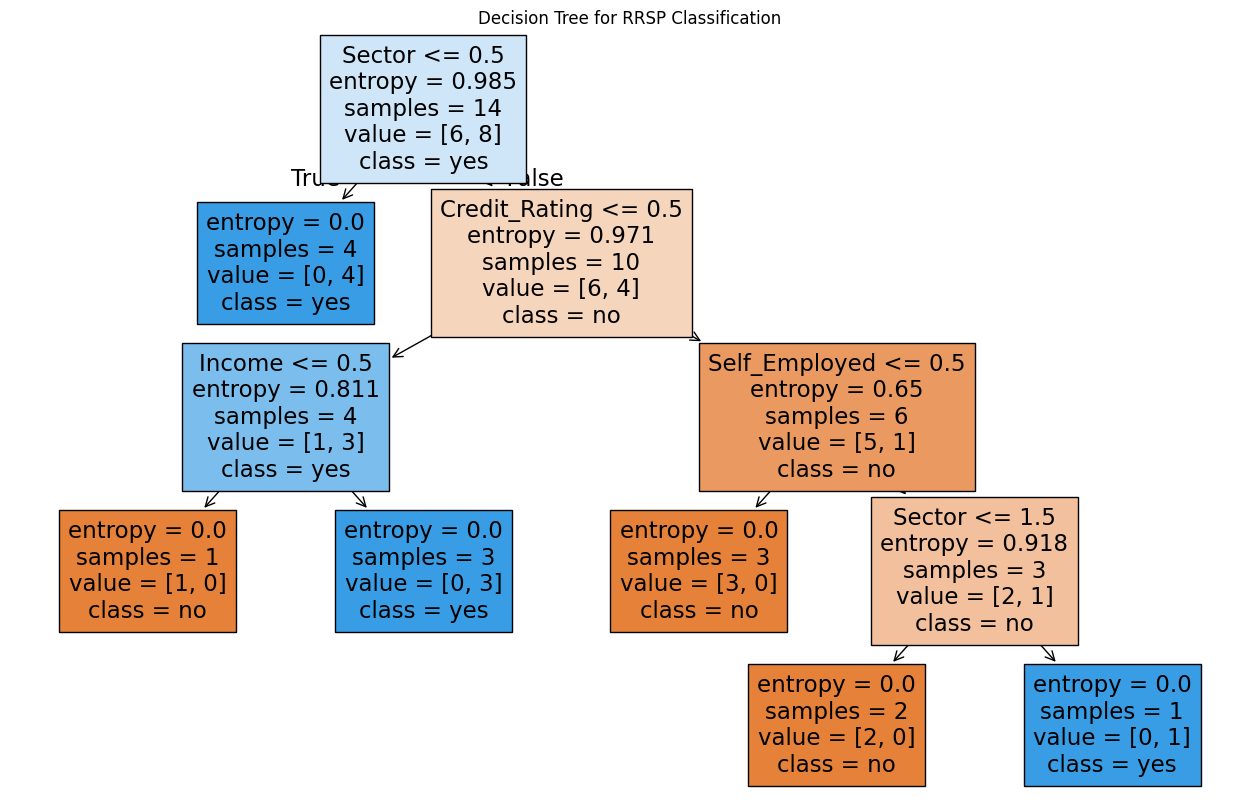

In [23]:
plt.figure(figsize=(16, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.title("Decision Tree for RRSP Classification")
plt.show()

<H5> Interpretation </H5>
The tree first splits on Sector, confirming our earlier manual calculation.
The decision tree reveals that banking sector clients almost always buy RRSPs.
Income and credit rating further refine the decisions in the other branches.

<H3> QUESTION 02 </H3>

In [67]:
#Defining original dataset
data = [
    ['farming', 'medium', 'no', 'fair', 'no'],
    ['farming', 'low', 'yes', 'fair', 'no'],
    ['oil industry', 'medium', 'no', 'fair', 'no'],
    ['oil industry', 'low', 'yes', 'fair', 'yes'],
    ['oil industry', 'medium', 'yes', 'excellent', 'yes'],
    ['banking', 'medium', 'no', 'excellent', 'yes'],
    ['oil industry', 'high', 'no', 'fair', 'no'],
    ['oil industry', 'high', 'no', 'excellent', 'no'],
    ['banking', 'high', 'no', 'fair', 'yes'],
    ['farming', 'low', 'yes', 'excellent', 'yes'],
    ['banking', 'low', 'yes', 'excellent', 'yes'],
    ['farming', 'medium', 'yes', 'fair', 'no'],
    ['banking', 'high', 'yes', 'fair', 'yes'],
    ['farming', 'medium', 'no', 'excellent', 'yes']
]

In [69]:
columns = ['Sector', 'Income', 'Self_Employed', 'Credit_Rating', 'Buys_RRSP']
df = pd.DataFrame(data, columns=columns)

In [71]:
#Define new instance
new_instance = {
    'Sector': 'oil industry',
    'Income': 'medium',
    'Self_Employed': 'yes',
    'Credit_Rating': 'fair'
}

In [73]:
#Define similarity function with weights
weights = {
    'Sector': 1,
    'Income': 2,
    'Self_Employed': 1,
    'Credit_Rating': 1
}

In [75]:
def compute_similarity(row, new_inst, weights):
    score = 0
    for feature in weights:
        score += weights[feature] if row[feature] == new_inst[feature] else 0
    return score / 4.0

In [77]:
#Apply similarity calculation to all rows
df['Similarity'] = df.apply(lambda row: compute_similarity(row, new_instance, weights), axis=1)

In [79]:
#Sort by similarity and pick top k=5
top_k = df.sort_values(by='Similarity', ascending=False).head(5)

In [81]:
#Determine the majority class
prediction = top_k['Buys_RRSP'].mode()[0]

In [83]:
# Display results
print("Top 5 most similar examples:\n")
print(top_k[['Sector', 'Income', 'Self_Employed', 'Credit_Rating', 'Buys_RRSP', 'Similarity']])
print(f"\nPredicted class for the new instance: {prediction}")

Top 5 most similar examples:

          Sector  Income Self_Employed Credit_Rating Buys_RRSP  Similarity
2   oil industry  medium            no          fair        no        1.00
4   oil industry  medium           yes     excellent       yes        1.00
11       farming  medium           yes          fair        no        1.00
0        farming  medium            no          fair        no        0.75
3   oil industry     low           yes          fair       yes        0.75

Predicted class for the new instance: no


<H5> Interpretation </H5>
Among the top 5 most similar records, 3 have class = no, and 2 have class = yes.
Predicted class = no (by majority vote of k = 5).

<H3> QUESTION 03 </H3>

<H3> Define and Encode the Dataset </H3>

In [108]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

In [110]:
# Define original dataset
data = [
    ['farming', 'medium', 'no', 'fair', 'no'],
    ['farming', 'low', 'yes', 'fair', 'no'],
    ['oil industry', 'medium', 'no', 'fair', 'no'],
    ['oil industry', 'low', 'yes', 'fair', 'yes'],
    ['oil industry', 'medium', 'yes', 'excellent', 'yes'],
    ['banking', 'medium', 'no', 'excellent', 'yes'],
    ['oil industry', 'high', 'no', 'fair', 'no'],
    ['oil industry', 'high', 'no', 'excellent', 'no'],
    ['banking', 'high', 'no', 'fair', 'yes'],
    ['farming', 'low', 'yes', 'excellent', 'yes'],
    ['banking', 'low', 'yes', 'excellent', 'yes'],
    ['farming', 'medium', 'yes', 'fair', 'no'],
    ['banking', 'high', 'yes', 'fair', 'yes'],
    ['farming', 'medium', 'no', 'excellent', 'yes']
]

In [112]:
columns = ['Sector', 'Income', 'Self_Employed', 'Credit_Rating', 'Buys_RRSP']
df = pd.DataFrame(data, columns=columns)


In [114]:
# Encode categorical variables
encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

<h3> Prepare Features and Target </h3>

In [116]:
X = df.drop('Buys_RRSP', axis=1)
y = df['Buys_RRSP']

In [118]:
# Encode new instance
new_instance_raw = {
    'Sector': 'oil industry',
    'Income': 'medium',
    'Self_Employed': 'yes',
    'Credit_Rating': 'fair'
}

In [120]:
new_encoded = [[encoders[col].transform([new_instance_raw[col]])[0] for col in X.columns]]

<h3> Q3(a): Decision Tree Prediction </h3>

In [127]:
# Train Decision Tree
clf_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [129]:

# Predict class
tree_pred = clf_tree.predict(new_encoded)[0]
tree_proba = clf_tree.predict_proba(new_encoded)

C:\Users\conta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\conta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [131]:

# Show tree rules
print("Decision Tree Rules:\n")
print(export_text(clf_tree, feature_names=list(X.columns)))

Decision Tree Rules:

|--- Sector <= 0.50
|   |--- class: 1
|--- Sector >  0.50
|   |--- Credit_Rating <= 0.50
|   |   |--- Income <= 0.50
|   |   |   |--- class: 0
|   |   |--- Income >  0.50
|   |   |   |--- class: 1
|   |--- Credit_Rating >  0.50
|   |   |--- Self_Employed <= 0.50
|   |   |   |--- class: 0
|   |   |--- Self_Employed >  0.50
|   |   |   |--- Sector <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Sector >  1.50
|   |   |   |   |--- class: 1



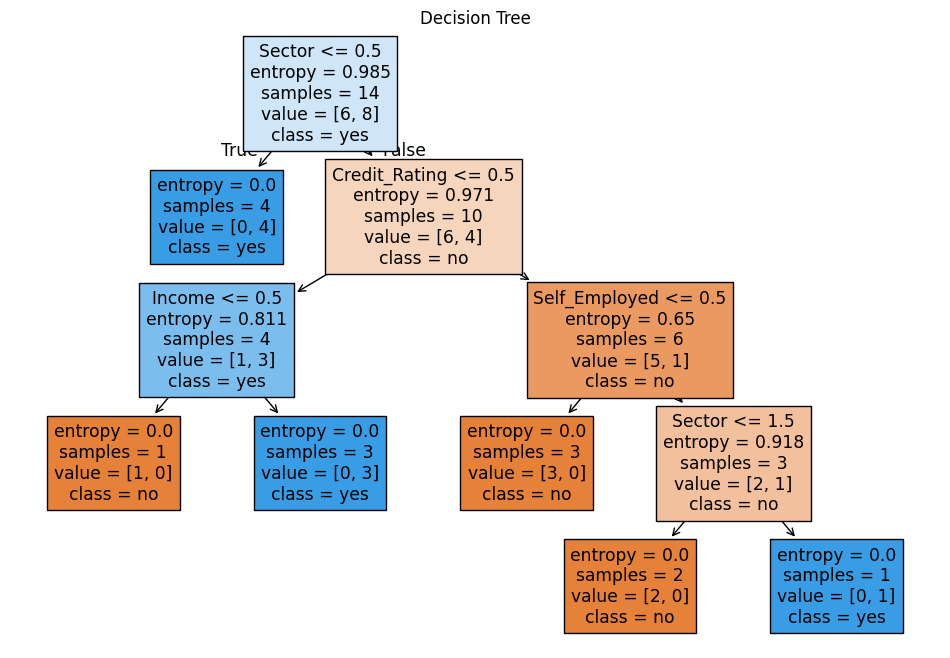

In [133]:

# Plot the tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_tree, feature_names=X.columns, class_names=encoders['Buys_RRSP'].classes_, filled=True)
plt.title("Decision Tree")
plt.show()

In [135]:

# Output
print(f"Decision Tree Prediction: {encoders['Buys_RRSP'].inverse_transform([tree_pred])[0]}")
print(f"Probability: {tree_proba[0]}")

Decision Tree Prediction: yes
Probability: [0. 1.]


<H3> Q3(b): Naïve Bayes Prediction </H3>

In [138]:
# Train Naïve Bayes
clf_nb = CategoricalNB()
clf_nb.fit(X, y)

CategoricalNB()

In [140]:

# Predict
nb_pred = clf_nb.predict(new_encoded)[0]
nb_proba = clf_nb.predict_proba(new_encoded)

C:\Users\conta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
C:\Users\conta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [142]:

# Output
print(f"Naïve Bayes Prediction: {encoders['Buys_RRSP'].inverse_transform([nb_pred])[0]}")
print(f"Probability: {nb_proba[0]}")

Naïve Bayes Prediction: no
Probability: [0.63644014 0.36355986]


<H3> Q3(c): Comparison Summary </H3>

In [145]:
# Translate numeric predictions to class labels
tree_result = encoders['Buys_RRSP'].inverse_transform([tree_pred])[0]
nb_result = encoders['Buys_RRSP'].inverse_transform([nb_pred])[0]


In [149]:

print("\n Prediction Comparison:")
print(f"✔ Decision Tree predicts: {tree_result} with probability {tree_proba[0][tree_pred]:.2f}")
print(f"✔ Naïve Bayes predicts: {nb_result} with probability {nb_proba[0][nb_pred]:.2f}")


 Prediction Comparison:
✔ Decision Tree predicts: yes with probability 1.00
✔ Naïve Bayes predicts: no with probability 0.64


<H5> Interpretation </H5>
The Decision Tree classifier models feature interactions and usually performs better on structured rules.
Naïve Bayes assumes independence between features, which can underperform when that’s not true.

<H3> QUESTION 04 </H3>

In [155]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [157]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [159]:

#Prepare transactions (as attribute=value pairs)
transactions = [
    ['Sector=farming', 'Income=medium', 'Self_Employed=no', 'Credit_Rating=fair', 'Class=no'],
    ['Sector=farming', 'Income=low', 'Self_Employed=yes', 'Credit_Rating=fair', 'Class=no'],
    ['Sector=oil industry', 'Income=medium', 'Self_Employed=no', 'Credit_Rating=fair', 'Class=no'],
    ['Sector=oil industry', 'Income=low', 'Self_Employed=yes', 'Credit_Rating=fair', 'Class=yes'],
    ['Sector=oil industry', 'Income=medium', 'Self_Employed=yes', 'Credit_Rating=excellent', 'Class=yes'],
    ['Sector=banking', 'Income=medium', 'Self_Employed=no', 'Credit_Rating=excellent', 'Class=yes'],
    ['Sector=oil industry', 'Income=high', 'Self_Employed=no', 'Credit_Rating=fair', 'Class=no'],
    ['Sector=oil industry', 'Income=high', 'Self_Employed=no', 'Credit_Rating=excellent', 'Class=no'],
    ['Sector=banking', 'Income=high', 'Self_Employed=no', 'Credit_Rating=fair', 'Class=yes'],
    ['Sector=farming', 'Income=low', 'Self_Employed=yes', 'Credit_Rating=excellent', 'Class=yes'],
    ['Sector=banking', 'Income=low', 'Self_Employed=yes', 'Credit_Rating=excellent', 'Class=yes'],
    ['Sector=farming', 'Income=medium', 'Self_Employed=yes', 'Credit_Rating=fair', 'Class=no'],
    ['Sector=banking', 'Income=high', 'Self_Employed=yes', 'Credit_Rating=fair', 'Class=yes'],
    ['Sector=farming', 'Income=medium', 'Self_Employed=no', 'Credit_Rating=excellent', 'Class=yes']
]



In [161]:
#Encode transaction data
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)



In [163]:
#Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)


In [165]:

#Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)


In [167]:

#Filter rules with 'Class=' as the consequent
rules = rules[rules['consequents'].apply(lambda x: any(item.startswith('Class=') for item in x))]


In [169]:

#Sort rules by confidence
rules_sorted = rules.sort_values(by='confidence', ascending=False)


In [171]:

#Define new instance as a set
new_instance = {
    'Sector=oil industry',
    'Income=medium',
    'Self_Employed=yes',
    'Credit_Rating=fair'
}



In [173]:
#Find matching rules
matching_rules = rules_sorted[rules_sorted['antecedents'].apply(lambda x: x.issubset(new_instance))]



In [175]:
#Predict class
if not matching_rules.empty:
    top_rule_class = list(matching_rules.iloc[0]['consequents'])[0]
    majority_class = matching_rules['consequents'].apply(lambda x: list(x)[0]).mode()[0]
else:
    top_rule_class = "Unknown"
    majority_class = "Unknown"



In [177]:
#Display outputs
print("✅ Matching Rules:\n")
print(matching_rules[['antecedents', 'consequents', 'support', 'confidence']])
print(f"\n🔍 Predicted class using top-confidence rule: {top_rule_class}")
print(f"📊 Predicted class using majority voting: {majority_class}")

✅ Matching Rules:

                                   antecedents                   consequents  \
80    (Self_Employed=yes, Sector=oil industry)                   (Class=yes)   
22         (Income=medium, Credit_Rating=fair)                    (Class=no)   
10                         (Self_Employed=yes)                   (Class=yes)   
134  (Credit_Rating=fair, Sector=oil industry)  (Class=no, Self_Employed=no)   
28   (Credit_Rating=fair, Sector=oil industry)                    (Class=no)   
120        (Income=medium, Credit_Rating=fair)  (Class=no, Self_Employed=no)   
112        (Income=medium, Credit_Rating=fair)    (Class=no, Sector=farming)   
1                         (Credit_Rating=fair)                    (Class=no)   
48                       (Sector=oil industry)  (Class=no, Self_Employed=no)   
3                        (Sector=oil industry)                    (Class=no)   

      support  confidence  
80   0.142857    1.000000  
22   0.214286    1.000000  
10   0.357143   

<H3> Output Interpretation </H3>

<b> top_rule_class: </b>This is the class label from the single most confident rule matching the new instance. <br>
<b> majority_class: </b>This is the class label that appears most frequently among all matching rules.

<H3> QUESTION 05 </H3>

In [185]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Define the dataset
points = np.array([
    [26, 18],  # A1
    [20, 26],  # A2
    [14, 20],  # A3
    [24, 20],  # A4
    [14, 30],  # A5
    [22, 18],  # A6
    [8, 18],   # A7
    [12, 14]   # A8
])


In [187]:

labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']



In [189]:
# Step 2: Apply KMeans clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(points)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [191]:

# Step 3: Create DataFrame to display results
df_result = pd.DataFrame(points, columns=['X', 'Y'])
df_result['Label'] = labels
df_result['Cluster'] = cluster_labels


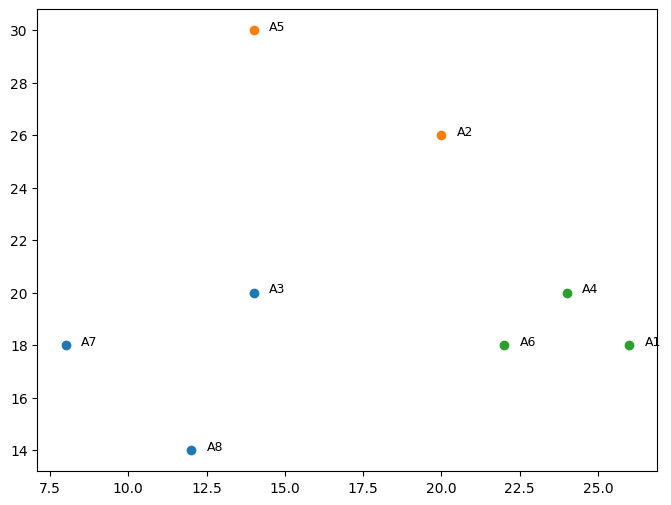

In [193]:

# Plot clusters and centroids
plt.figure(figsize=(8, 6))
for i in range(3):
    cluster_points = df_result[df_result['Cluster'] == i]
    plt.scatter(cluster_points['X'], cluster_points['Y'], label=f'Cluster {i}')
    for _, row in cluster_points.iterrows():
        plt.text(row['X']+0.5, row['Y'], row['Label'], fontsize=9)


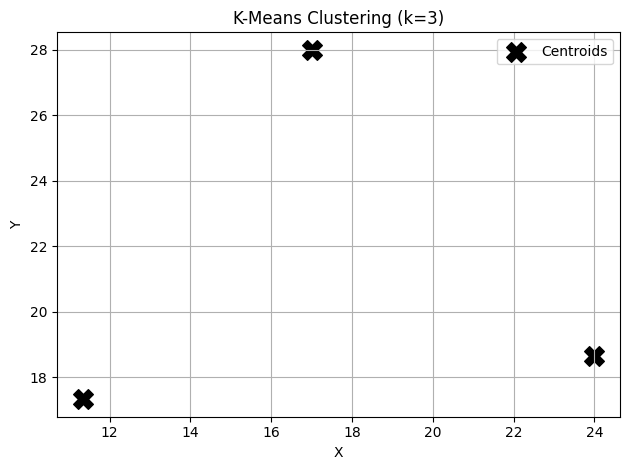

In [195]:

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (k=3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [197]:

# Showing the final table and centroids
print("📊 Clustered Points:")
print(df_result)

print("\n📌 Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")


📊 Clustered Points:
    X   Y Label  Cluster
0  26  18    A1        2
1  20  26    A2        1
2  14  20    A3        0
3  24  20    A4        2
4  14  30    A5        1
5  22  18    A6        2
6   8  18    A7        0
7  12  14    A8        0

📌 Cluster Centroids:
Cluster 0: (11.33, 17.33)
Cluster 1: (17.00, 28.00)
Cluster 2: (24.00, 18.67)


<h3> Output and Interpretation </h3>

The output includes a scatter plot of the 8 points grouped into 3 clusters.

Labels (A1 to A8) are shown on the plot.

Centroids are marked with black X symbols.

A table displays each point’s cluster assignment and coordinates.

<H3> QUESTION 06 </H3>

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist



In [205]:

#Define the dataset
points = np.array([
    [4, 20],   # A1
    [4, 10],   # A2
    [16, 8],   # A3
    [10, 16],  # A4
    [14, 10],  # A5
    [12, 8],   # A6
    [2, 4],    # A7
    [8, 18]    # A8
])
labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']


In [207]:

#Compute distance matrix using Euclidean distance
distance_matrix = pdist(points, metric='euclidean')



In [209]:
#Function to plot dendrogram
def plot_dendrogram(method_name, linkage_method):
    linkage_matrix = sch.linkage(distance_matrix, method=linkage_method)
    plt.figure(figsize=(10, 5))
    sch.dendrogram(linkage_matrix, labels=labels)
    plt.title(f'Hierarchical Clustering - {method_name} Linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

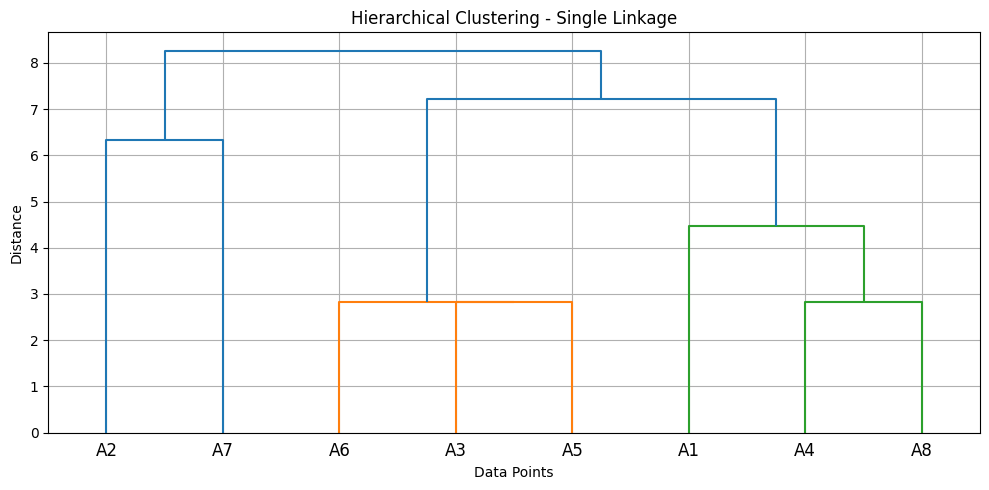

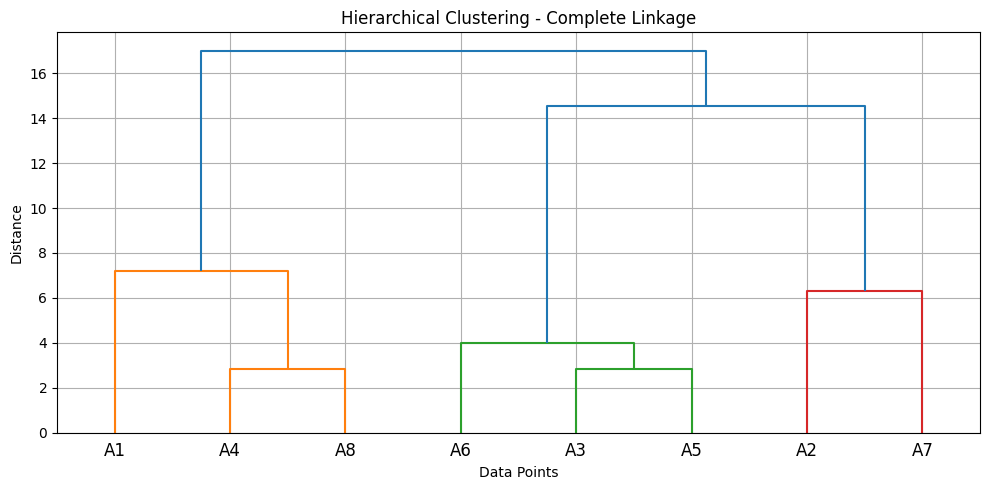

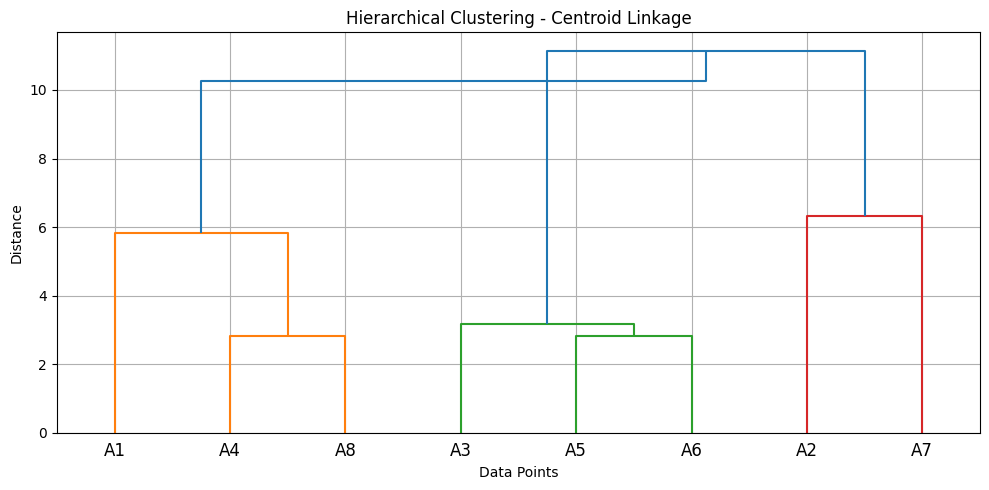

In [211]:
# Step 4: Plot all linkage types
plot_dendrogram('Single', 'single')
plot_dendrogram('Complete', 'complete')
plot_dendrogram('Centroid', 'centroid')

<h3> Output and Interpretation </h3>

Each plot shows a dendrogram for:

<b> Single linkage: </b> based on the minimum distance between clusters

<b> Complete linkage: </b> based on the maximum distance between clusters

<b> Centroid linkage: </b> based on the distance between cluster centroids

<H3> QUESTION 07 </H3>

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN




In [220]:
#Define the dataset
points = np.array([
    [2, 10],  # A1
    [2, 5],   # A2
    [8, 4],   # A3
    [5, 8],   # A4
    [7, 5],   # A5
    [6, 4],   # A6
    [1, 2],   # A7
    [4, 9]    # A8
])

labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']



In [222]:
#Run DBSCAN with ε = 2 and min_samples = 2
dbscan_eps2 = DBSCAN(eps=2, min_samples=2)
clusters_eps2 = dbscan_eps2.fit_predict(points)


In [224]:
#Run DBSCAN with ε = √10 ≈ 3.16
dbscan_eps_sqrt10 = DBSCAN(eps=np.sqrt(10), min_samples=2)
clusters_eps_sqrt10 = dbscan_eps_sqrt10.fit_predict(points)



In [226]:
#Plot function for DBSCAN results
def plot_clusters(points, cluster_labels, title, labels):
    unique_clusters = set(cluster_labels)
    plt.figure(figsize=(7, 5))
    for cluster in unique_clusters:
        cluster_pts = points[np.array(cluster_labels) == cluster]
        plt.scatter(cluster_pts[:, 0], cluster_pts[:, 1], label=f'Cluster {cluster}' if cluster != -1 else 'Noise')
    for i, label in enumerate(labels):
        plt.text(points[i][0] + 0.2, points[i][1], label, fontsize=9)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



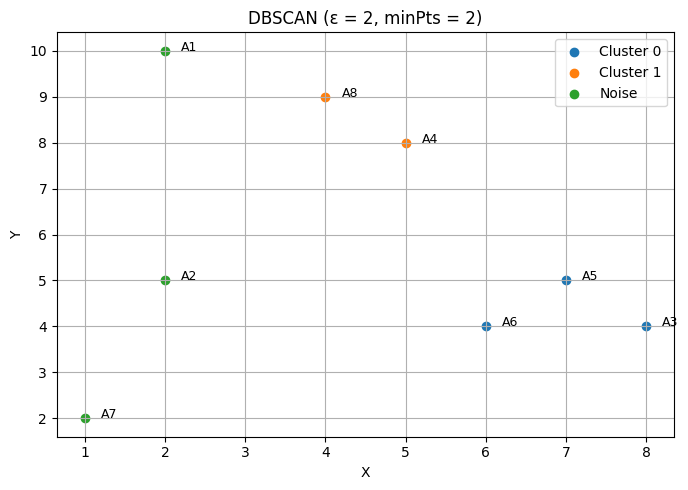

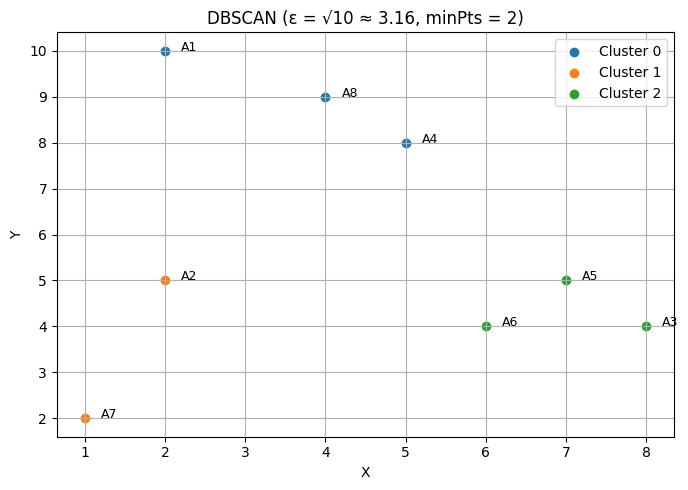

In [228]:
#Visualize both settings
plot_clusters(points, clusters_eps2, "DBSCAN (ε = 2, minPts = 2)", labels)
plot_clusters(points, clusters_eps_sqrt10, "DBSCAN (ε = √10 ≈ 3.16, minPts = 2)", labels)



In [230]:
#Create and show results table
df_result = pd.DataFrame(points, columns=['X', 'Y'])
df_result['Label'] = labels
df_result['Cluster (ε=2)'] = clusters_eps2
df_result['Cluster (ε=√10)'] = clusters_eps_sqrt10


In [232]:

print("📊 DBSCAN Clustering Results:")
print(df_result)

📊 DBSCAN Clustering Results:
   X   Y Label  Cluster (ε=2)  Cluster (ε=√10)
0  2  10    A1             -1                0
1  2   5    A2             -1                1
2  8   4    A3              0                2
3  5   8    A4              1                0
4  7   5    A5              0                2
5  6   4    A6              0                2
6  1   2    A7             -1                1
7  4   9    A8              1                0


<h3> Expected Output </h3> 

The scatter plots will show points color-coded by cluster.

Noise points are labeled as -1.

A table displays each point’s assigned cluster in both DBSCAN configurations.